In [64]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import MultiTaskLasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [65]:
df = pd.read_csv('Bondora_preprocessed2.csv', low_memory=False)

In [66]:
df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.00,12,130.393314,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,10500.0,0,0.00,0,0.00,0.00,25,F,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.00,1,130.393314,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,10800.0,0,0.00,0,0.00,0.00,15,F,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.00,20,130.393314,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,7000.0,0,0.00,0,0.00,0.00,25,F,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.00,15,130.393314,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,11600.0,0,0.00,0,0.00,0.00,15,F,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.00,12,130.393314,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,6800.0,0,0.00,0,0.00,0.00,25,F,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,Income verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.680000,LAHTI,Loan consolidation,Vocational education,Single,Fully employed,MoreThan5Years,Other,Council house,1400.0,1,500.00,0,7.69,792.32,1,E,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1
77390,1880,0,1120.0000,False,Income verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.330000,JOENSUU,Home improvement,Vocational education,Single,Fully employed,MoreThan5Years,Transport and warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0
77391,1975,0,525.0000,True,Income unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.420000,SAUVO,Loan consolidation,Vocational education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1
77392,1840,0,1160.0000,False,Income and expenses verified,Estonian,47,Woman,EE,3000.0000,3000.0000,17.74,60,84.510000,VALGA,Other,Higher education,Married,Fully employed,MoreThan5Years,Healthcare and social help,"Tenant, unfurnished property",540.0,8,732.05,2,44.35,50.49,1,B,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1


### Preferred EMI

emi = P x R x (1+R)^N / [(1+R)^N-1]<br>
“P” is the principal loan amount, <br>
“N” in tenure in months, <br>
and “R” is the prevailing interest rate.<br>

P -> Amount<br>
R -> Interest/12*100<br>
N -> LoanDuration<br>

In [67]:
data = df[['Amount','Interest','LoanDuration']]
data

,Amount,Interest,LoanDuration
0,115.0408,30.00,12
1,140.6057,25.00,1
2,319.5409,25.00,20
3,57.5205,45.00,15
4,319.5436,30.00,12
...,...,...,...
77389,3000.0000,31.01,60
77390,3000.0000,18.25,60
77391,2500.0000,24.83,60
77392,3000.0000,17.74,60


In [68]:
P = data['Amount']
R = data['Interest']/12/100
N = data['LoanDuration']
data['EMI'] = P * R * (1+R)**N /((1+R)**N-1)

In [69]:
df['EMI'] = data['EMI']
df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new,EMI
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.00,12,130.393314,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,10500.0,0,0.00,0,0.00,0.00,25,F,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0,11.214997
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.00,1,130.393314,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,10800.0,0,0.00,0,0.00,0.00,15,F,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0,143.534985
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.00,20,130.393314,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,7000.0,0,0.00,0,0.00,0.00,25,F,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1,19.699580
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.00,15,130.393314,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,11600.0,0,0.00,0,0.00,0.00,15,F,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0,5.083429
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.00,12,130.393314,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,6800.0,0,0.00,0,0.00,0.00,25,F,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1,31.151388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,Income verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.680000,LAHTI,Loan consolidation,Vocational education,Single,Fully employed,MoreThan5Years,Other,Council house,1400.0,1,500.00,0,7.69,792.32,1,E,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1,98.929540
77390,1880,0,1120.0000,False,Income verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.330000,JOENSUU,Home improvement,Vocational education,Single,Fully employed,MoreThan5Years,Transport and warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0,76.588868
77391,1975,0,525.0000,True,Income unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.420000,SAUVO,Loan consolidation,Vocational education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1,73.129355
77392,1840,0,1160.0000,False,Income and expenses verified,Estonian,47,Woman,EE,3000.0000,3000.0000,17.74,60,84.510000,VALGA,Other,Higher education,Married,Fully employed,MoreThan5Years,Healthcare and social help,"Tenant, unfurnished property",540.0,8,732.05,2,44.35,50.49,1,B,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1,75.756600


**My approach of calculating ROI**

ROI = Net income / Cost of investment x 100<br>
Cost of investment -> Total Amount.<br>
Net return -> Amount with interest<br>
Net return = AmountxInterest(This will be the net profit in addition to the Amount)

In [70]:
data = df[['Amount','Interest','LoanDuration']]
data

,Amount,Interest,LoanDuration
0,115.0408,30.00,12
1,140.6057,25.00,1
2,319.5409,25.00,20
3,57.5205,45.00,15
4,319.5436,30.00,12
...,...,...,...
77389,3000.0000,31.01,60
77390,3000.0000,18.25,60
77391,2500.0000,24.83,60
77392,3000.0000,17.74,60


In [71]:
TotalAmount = data['Amount'] * (data['Interest'] * 0.01 + 1)
NetIncome = data['Amount'] * data['Interest'] * 0.01
data['ROI'] = NetIncome / TotalAmount * 100

In [72]:
data['ROI'].max()

72.55084955120637

In [73]:
data

,Amount,Interest,LoanDuration,ROI
0,115.0408,30.00,12,23.076923
1,140.6057,25.00,1,20.000000
2,319.5409,25.00,20,20.000000
3,57.5205,45.00,15,31.034483
4,319.5436,30.00,12,23.076923
...,...,...,...,...
77389,3000.0000,31.01,60,23.669949
77390,3000.0000,18.25,60,15.433404
77391,2500.0000,24.83,60,19.891052
77392,3000.0000,17.74,60,15.067097


In [74]:
df['ROI'] = data['ROI']
df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new,EMI,ROI
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.00,12,130.393314,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,10500.0,0,0.00,0,0.00,0.00,25,F,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0,11.214997,23.076923
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.00,1,130.393314,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,10800.0,0,0.00,0,0.00,0.00,15,F,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0,143.534985,20.000000
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.00,20,130.393314,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,7000.0,0,0.00,0,0.00,0.00,25,F,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1,19.699580,20.000000
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.00,15,130.393314,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,11600.0,0,0.00,0,0.00,0.00,15,F,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0,5.083429,31.034483
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.00,12,130.393314,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,6800.0,0,0.00,0,0.00,0.00,25,F,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1,31.151388,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,Income verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.680000,LAHTI,Loan consolidation,Vocational education,Single,Fully employed,MoreThan5Years,Other,Council house,1400.0,1,500.00,0,7.69,792.32,1,E,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1,98.929540,23.669949
77390,1880,0,1120.0000,False,Income verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.330000,JOENSUU,Home improvement,Vocational education,Single,Fully employed,MoreThan5Years,Transport and warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0,76.588868,15.433404
77391,1975,0,525.0000,True,Income unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.420000,SAUVO,Loan consolidation,Vocational education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1,73.129355,19.891052
77392,1840,0,1160.0000,False,Income and expenses verified,Estonian,47,Woman,EE,3000.0000,3000.0000,17.74,60,84.510000,VALGA,Other,Higher education,Married,Fully employed,MoreThan5Years,Healthcare and social help,"Tenant, unfurnished property",540.0,8,732.05,2,44.35,50.49,1,B,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1,75.756600,15.067097


Preferred Loan Amount?<br>
Let's take it the same as the Amount.<br>
Because it is the actual amount that the borrower is eligible to receive from the lender. Eligible loan amount will be the preferred loan amount. 

Target Variables<br>
- Amount
- ROI
- EMI

**Label Encoding**

In [75]:
df.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
City                                       object
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object
EmploymentDurationCurrentEmployer          object


In [76]:
# Label encoding
for colname in df.select_dtypes(["object"]):
    df[colname], _ = df[colname].factorize()

In [77]:
df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new,EMI,ROI
0,0,0,115.0410,True,0,0,61,0,0,319.5582,115.0408,30.00,12,130.393314,0,0,0,0,0,0,0,0,10500.0,0,0.00,0,0.00,0.00,25,0,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0,11.214997,23.076923
1,0,0,140.6057,False,0,0,48,0,0,191.7349,140.6057,25.00,1,130.393314,1,0,1,1,0,1,1,0,10800.0,0,0.00,0,0.00,0.00,15,0,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0,143.534985,20.000000
2,0,0,319.5580,True,0,0,58,0,0,319.5582,319.5409,25.00,20,130.393314,2,1,2,0,0,2,2,0,7000.0,0,0.00,0,0.00,0.00,25,0,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1,19.699580,20.000000
3,0,0,57.5205,True,0,0,23,0,0,127.8233,57.5205,45.00,15,130.393314,3,2,3,2,1,3,3,0,11600.0,0,0.00,0,0.00,0.00,15,0,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0,5.083429,31.034483
4,0,0,319.5582,True,0,0,25,0,0,319.5582,319.5436,30.00,12,130.393314,4,3,2,3,0,3,0,0,6800.0,0,0.00,0,0.00,0.00,25,0,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1,31.151388,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,3,3,37,1,1,3000.0000,3000.0000,31.01,60,107.680000,201,2,0,2,0,1,3,5,1400.0,1,500.00,0,7.69,792.32,1,3,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1,98.929540,23.669949
77390,1880,0,1120.0000,False,3,3,35,1,1,3000.0000,3000.0000,18.25,60,85.330000,160,1,0,2,0,1,6,0,2265.0,5,1777.46,0,31.58,520.67,7,6,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0,76.588868,15.433404
77391,1975,0,525.0000,True,2,3,40,1,1,2500.0000,2500.0000,24.83,60,80.420000,797,2,0,0,4,1,7,0,2500.0,2,1350.00,0,3.22,1069.58,1,4,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1,73.129355,19.891052
77392,1840,0,1160.0000,False,1,0,47,0,0,3000.0000,3000.0000,17.74,60,84.510000,68,0,1,0,0,1,9,2,540.0,8,732.05,2,44.35,50.49,1,6,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1,75.756600,15.067097


We have selected some important features in the previous tasks from feature engineering. Let's take them into consideration.

In [78]:
imp_features = pd.read_csv('Important_features.csv')
imp_features

,InterestAndPenaltyBalance,PrincipalPaymentDifference,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,Status_new
0,0.00,115.0408,115.0408,0.00,20.4222,30.00,130.393314,115.0408,319.5582,0,0,0,False,12,25,0
1,0.00,140.6057,140.6057,0.00,2.0227,25.00,130.393314,140.6057,191.7349,0,0,0,False,1,15,0
2,414.07,86.8409,203.1909,116.35,59.7626,25.00,130.393314,319.5409,319.5582,0,0,0,True,20,25,1
3,0.00,57.5205,57.5205,0.00,18.7323,45.00,130.393314,57.5205,127.8233,0,0,0,False,15,15,0
4,0.00,319.5436,319.5436,0.00,220.4200,30.00,130.393314,319.5436,319.5582,0,0,0,False,12,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.00,2308.1900,2308.1900,0.00,0.0000,31.01,107.680000,3000.0000,3000.0000,3,3,1,False,60,1,1
77390,0.00,3000.0000,3000.0000,0.00,1990.0300,18.25,85.330000,3000.0000,3000.0000,3,6,1,False,60,7,0
77391,1227.98,1239.5200,1869.7600,630.24,199.3300,24.83,80.420000,2500.0000,2500.0000,3,4,1,False,60,1,1
77392,0.00,2257.5400,2257.5400,0.00,561.5300,17.74,84.510000,3000.0000,3000.0000,0,6,0,True,60,1,1


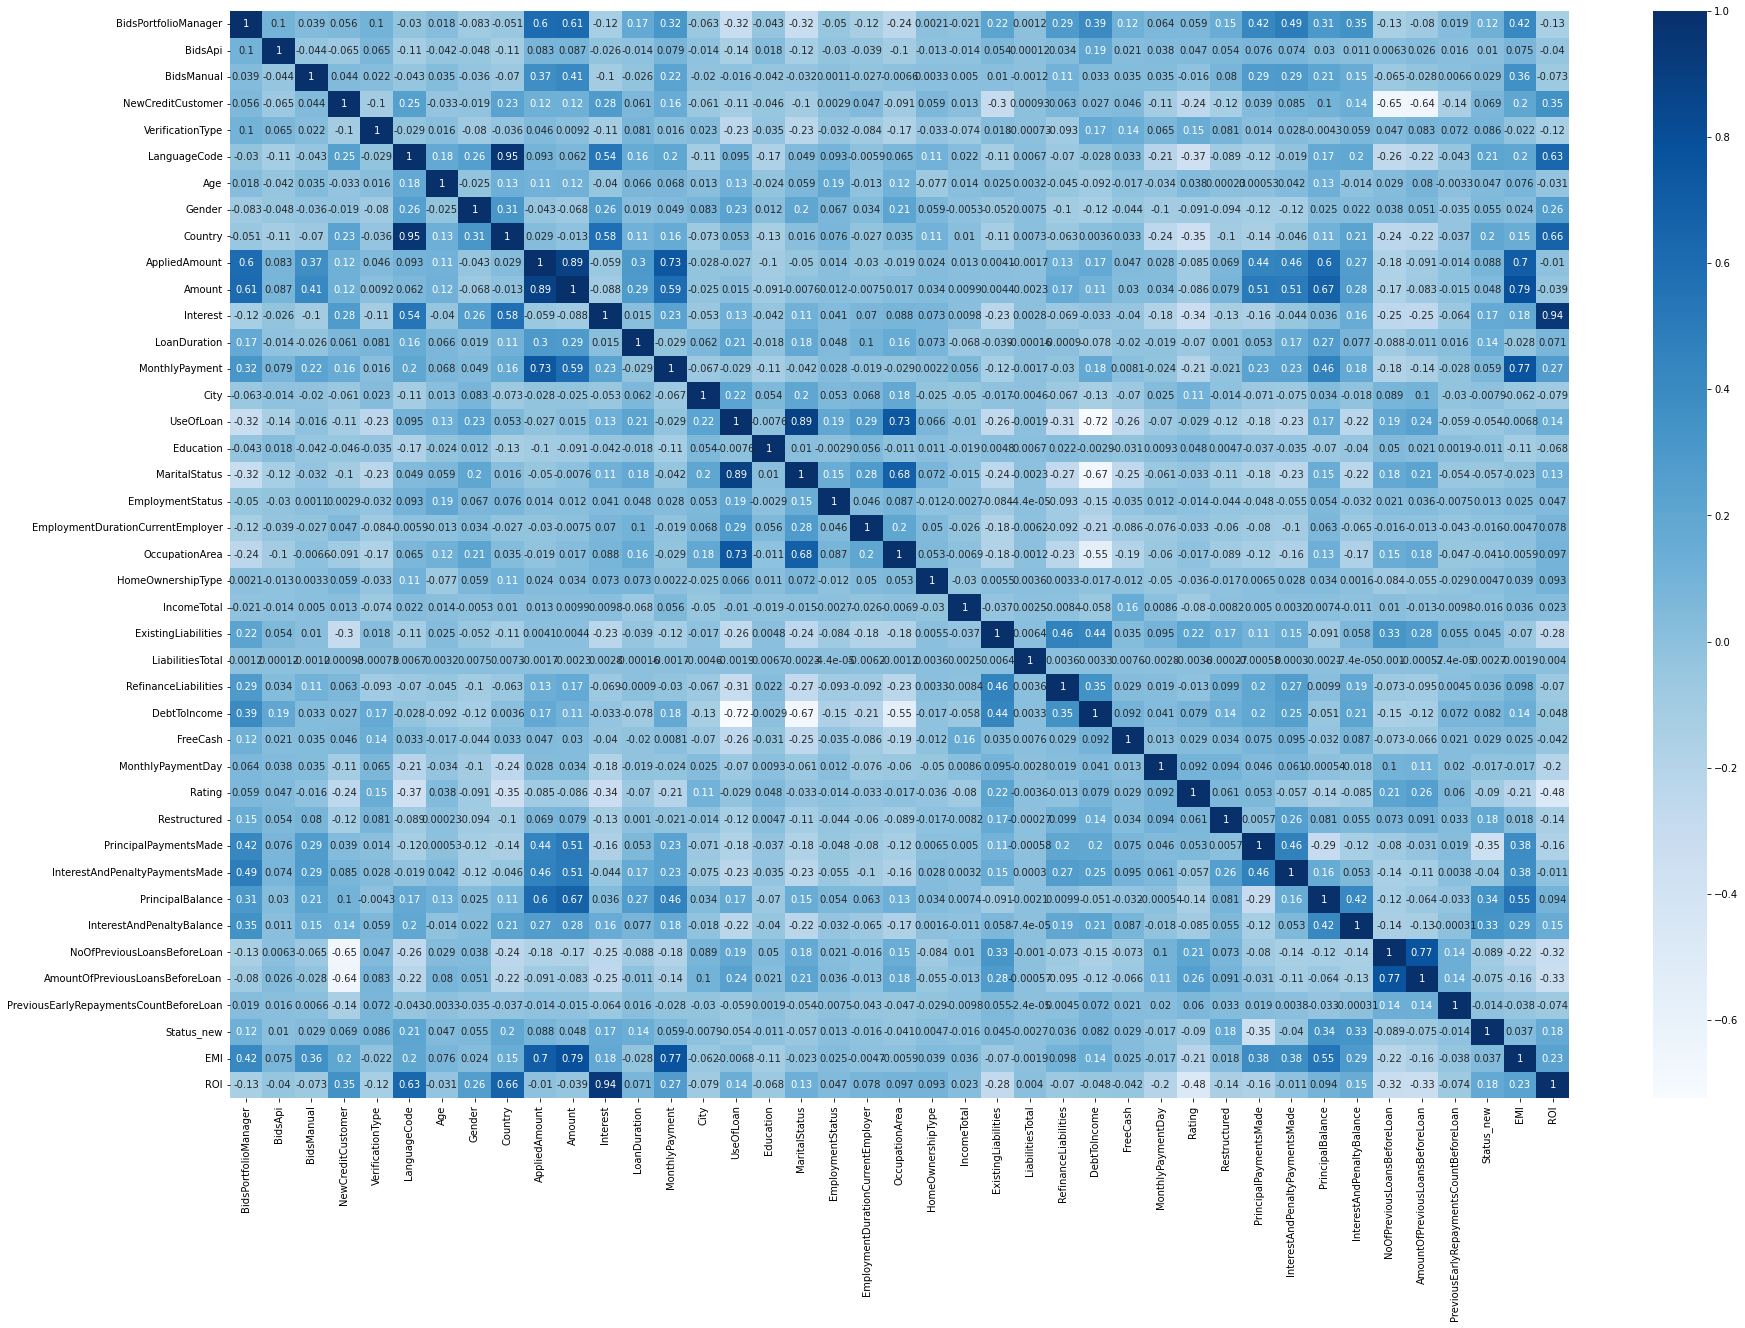

In [79]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

Let's observe some features which are highly correlated with our target variables.
- ROI is highly correlated with Interest
- EMI is highly correlated with MonthlyPayment, Amount and AppliedAmount and also have good correlation with PrincipalBalance, a little less with PrincipalPaymentsMade and InterestAndPenaltyPaymentsMade
- Amount is highly correlated with EMI, PrincipalBalance, MonthlyPayment, AppliedAmount, BidsPortfolioManager and a little less with PrincipalPaymentsMade and InterestAndPenaltyPaymentsMade and also BidsManual

The extra features we may take into consideration can be BidsPortfolioManager and BidsManual

In [80]:
imp_features.columns

Index(['InterestAndPenaltyBalance', 'PrincipalPaymentDifference',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyPaymentsMade', 'Interest', 'MonthlyPayment',
       'Amount', 'AppliedAmount', 'LanguageCode', 'Rating', 'Country',
       'Restructured', 'LoanDuration', 'MonthlyPaymentDay', 'Status_new'],
      dtype='object')

In [81]:
new_features = df[['InterestAndPenaltyBalance',
       'PrincipalPaymentsMade', 'PrincipalBalance','Status_new',
       'InterestAndPenaltyPaymentsMade', 'Interest', 'MonthlyPayment',
       'Amount', 'AppliedAmount','LanguageCode', 'Rating', 'Country', 
       'Restructured', 'LoanDuration', 'MonthlyPaymentDay', 'BidsPortfolioManager','BidsManual','EMI','ROI']]

In [82]:
new_features

,InterestAndPenaltyBalance,PrincipalPaymentsMade,PrincipalBalance,Status_new,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,BidsPortfolioManager,BidsManual,EMI,ROI
0,0.00,115.0408,0.00,0,20.4222,30.00,130.393314,115.0408,319.5582,0,0,0,False,12,25,0,115.0410,11.214997,23.076923
1,0.00,140.6057,0.00,0,2.0227,25.00,130.393314,140.6057,191.7349,0,0,0,False,1,15,0,140.6057,143.534985,20.000000
2,414.07,203.1909,116.35,1,59.7626,25.00,130.393314,319.5409,319.5582,0,0,0,True,20,25,0,319.5580,19.699580,20.000000
3,0.00,57.5205,0.00,0,18.7323,45.00,130.393314,57.5205,127.8233,0,0,0,False,15,15,0,57.5205,5.083429,31.034483
4,0.00,319.5436,0.00,1,220.4200,30.00,130.393314,319.5436,319.5582,0,0,0,False,12,25,0,319.5582,31.151388,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.00,2308.1900,0.00,1,0.0000,31.01,107.680000,3000.0000,3000.0000,3,3,1,False,60,1,2515,485.0000,98.929540,23.669949
77390,0.00,3000.0000,0.00,0,1990.0300,18.25,85.330000,3000.0000,3000.0000,3,6,1,False,60,7,1880,1120.0000,76.588868,15.433404
77391,1227.98,1869.7600,630.24,1,199.3300,24.83,80.420000,2500.0000,2500.0000,3,4,1,False,60,1,1975,525.0000,73.129355,19.891052
77392,0.00,2257.5400,0.00,1,561.5300,17.74,84.510000,3000.0000,3000.0000,0,6,0,True,60,1,1840,1160.0000,75.756600,15.067097


## Lasso Regression - L1 Regularisation

First, let's do this with whole dataset

In [140]:
X = df.drop(['EMI','ROI','Amount'],axis=1).copy()
y = df[['EMI','ROI','Amount']]

In [141]:
def plotgraph(y_test, y_pred):
    y_test1 = np.array(y_test)
    num_targets = y_test1.shape[1]

        # Plot the actual values against the predicted values for each target variable
    for i,target in enumerate(y_test):
        plt.figure()
        plt.scatter(y_test1[:, i], y_pred[:, i])
        plt.plot([np.min(y_test1[:, i]), np.max(y_test1[:, i])], [np.min(y_test1[:, i]), np.max(y_test1[:, i])], 'r--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('MultiTaskLasso: Actual vs Predicted (Target {})'.format(target))

    plt.show()

In [146]:
def multilasso(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    model = MultiTaskLasso(alpha=0.1)  # Adjust the regularization strength with the alpha parameter
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Print the coefficients for each target variable
#     for i, target_name in enumerate(y_train):
#         print('Target: ',target_name)
#         coefficients = pd.DataFrame({"Features": X.columns, 'Coefficients': model.coef_[i]})
#         print(coefficients)
    mse_scores = mean_squared_error(y_test, y_pred, multioutput='raw_values')

    r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')

    # for ['EMI','ROI','Amount']
    print("Mean Squared Error (MSE):", mse_scores)
    print("R-squared:", r2_scores)
    
    plotgraph(y_test,y_pred)

Mean Squared Error (MSE): [1.20513855e+03 7.86206669e+00 4.31969640e+04]
R-squared: [0.88103725 0.93679935 0.99074885]


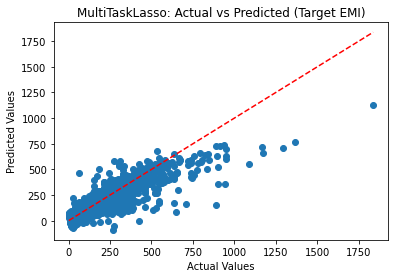

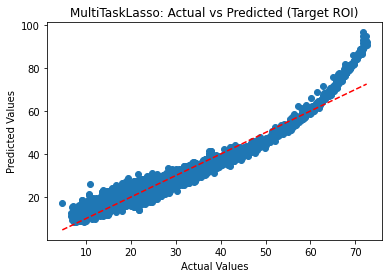

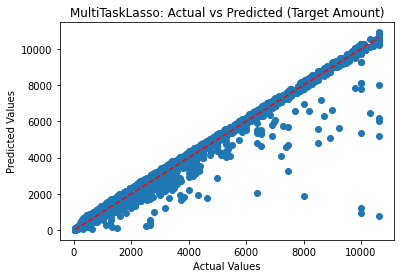

In [147]:
multilasso(X,y)

**Hyperparametric Tuning**

In [24]:
def tuning(X,y):
    # Load your dataset and split it into features (X) and target variable (y)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define the hyperparameter grid
    param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

    # Create the Lasso Regression model
    model = MultiTaskLasso() 

    # Perform grid search cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameter value and model
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    # Calculate mean squared error on the test set
    mse = mean_squared_error(y_test, y_pred,multioutput='raw_values')
    r2 = r2_score(y_test,y_pred,multioutput='raw_values')
    print('MSE:',mse)
    print('R-squared:',r2)
    print('Best Alpha:',best_alpha)
    plotgraph(y_test, y_pred)

MSE: [1.21011755e+03 7.98811064e+00 4.31958855e+04]
R-squared: [0.88054575 0.93578612 0.99074909]
Best Alpha: 1.0


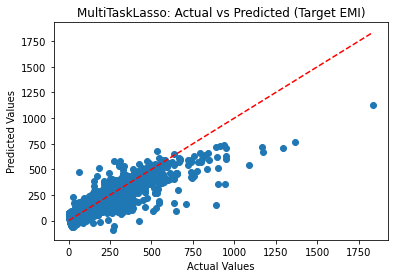

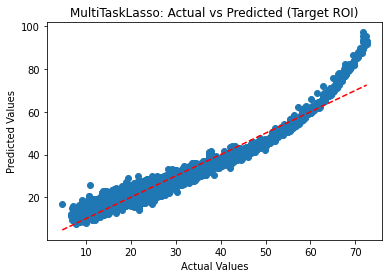

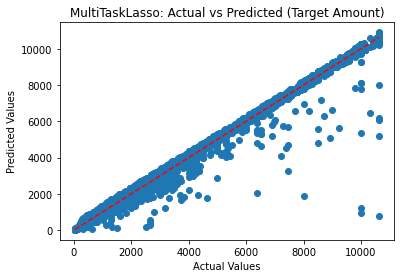

In [25]:
tuning(X,y)

Let's do this using our selected features

In [26]:
X_new = new_features.drop(['EMI','ROI','Amount'],axis=1).copy()
y_new = new_features[['EMI','ROI','Amount']]

Mean Squared Error (MSE): [1.23822086e+03 8.64231928e+00 4.32686735e+04]
R-squared: [0.8777716  0.93052714 0.9907335 ]


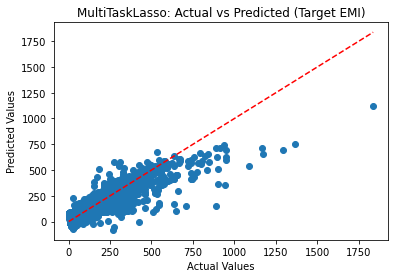

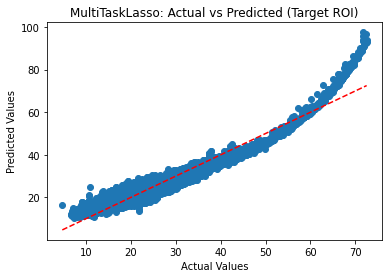

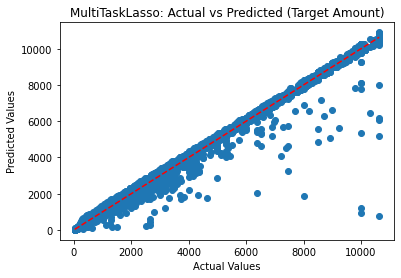

In [27]:
multilasso(X_new,y_new)

MSE: [1.23848778e+03 8.64057840e+00 4.32720538e+04]
R-squared: [0.87774525 0.93054114 0.99073277]
Best Alpha: 0.01


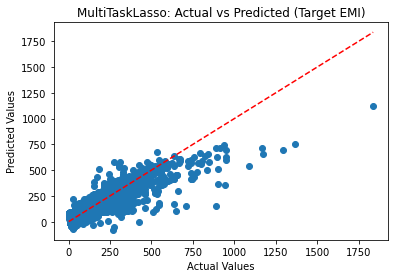

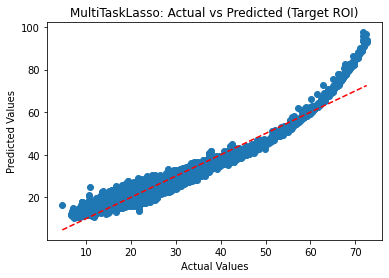

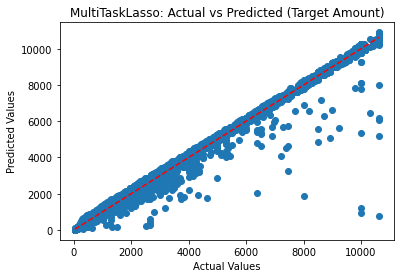

In [28]:
tuning(X_new,y_new)

## Polynomial Regression

**Predict EMI**

In [176]:
X = df.drop(['ROI','Amount'],axis=1).copy()
y = X.pop('EMI')

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [178]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 416.9128329840694
Root Mean Squared Error (RMSE): 20.418443451548146
R-squared (R2) Score: 0.9594354854557892


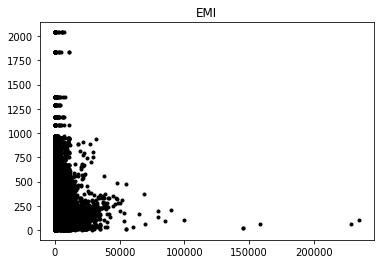

In [179]:
plt.plot(X_test,y_test,'k.')

plt.title('EMI');

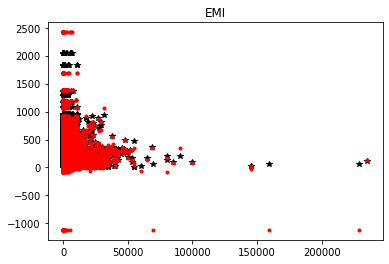

In [180]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test, y_pred,'r.')
plt.title('EMI');

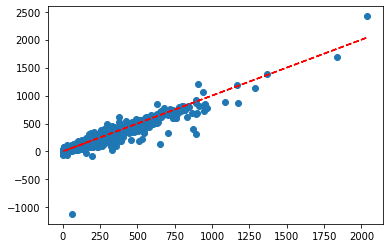

In [181]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()

In [162]:
X_new = new_features.drop(['ROI','Amount'],axis=1).copy()
y_new = X_new.pop('EMI')

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [164]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 389.13565562547825
Root Mean Squared Error (RMSE): 19.726521630167806
R-squared (R2) Score: 0.9621381312508221


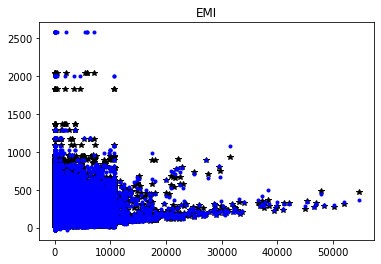

In [165]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test,y_pred,'b.');
plt.title('EMI');

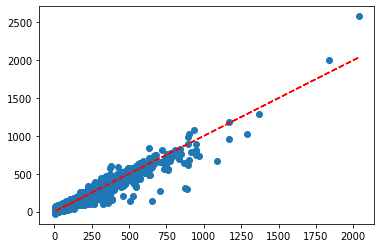

In [166]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()

**Predict ROI**

In [193]:
X = df.drop(['EMI','Amount'],axis=1).copy()
y = X.pop('ROI')

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [195]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.3629089668829048
Root Mean Squared Error (RMSE): 0.6024192617130572
R-squared (R2) Score: 0.9970559659083077


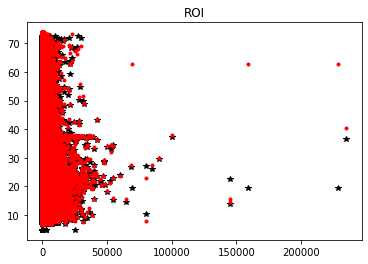

In [196]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test, y_pred,'r.')
plt.title('ROI');

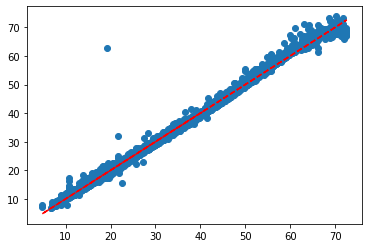

In [171]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()

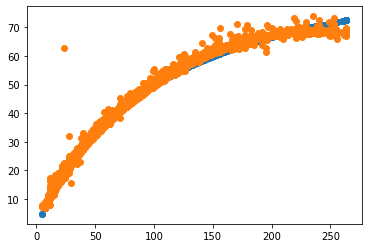

In [199]:
plt.scatter(X_test['Interest'],y_test)
plt.scatter(X_test['Interest'],y_pred)

In [45]:
X_new = new_features.drop(['EMI','Amount'],axis=1).copy()
y_new = X_new.pop('ROI')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [47]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.3363079515078812
Root Mean Squared Error (RMSE): 0.5799206424226345
R-squared (R2) Score: 0.9972717618882482


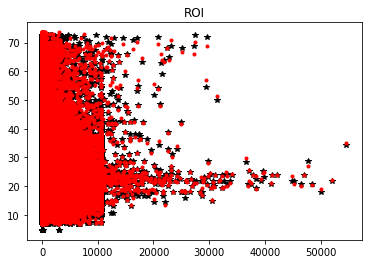

In [48]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test, y_pred,'r.')
plt.title('ROI');

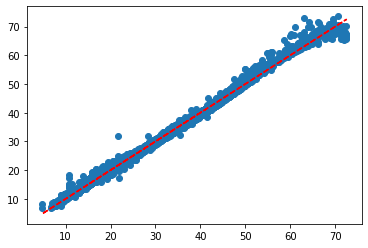

In [49]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()

**Predicting Amount**

In [50]:
X = df.drop(['EMI','ROI'],axis=1).copy()
y = X.pop('Amount')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 6414.34031748057
Root Mean Squared Error (RMSE): 80.08957683419591
R-squared (R2) Score: 0.998618584283724


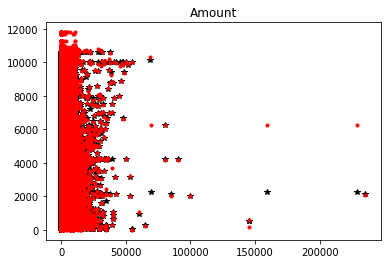

In [53]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test, y_pred,'r.')
plt.title('Amount');

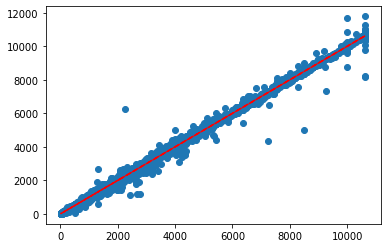

In [54]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()

In [55]:
X_new = new_features.drop(['EMI','ROI'],axis=1).copy()
y_new = X_new.pop('Amount')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [57]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
reg = LinearRegression().fit(x_poly, y_train)

# Make predictions on the test data
y_pred = reg.predict(poly.fit_transform(X_test))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9674.784062395263
Root Mean Squared Error (RMSE): 98.36048018587172
R-squared (R2) Score: 0.9979164032318417


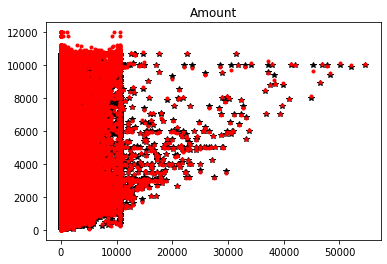

In [58]:
plt.plot(X_test,y_test,'k*')
plt.plot(X_test,y_pred,'r.')
plt.title('Amount');

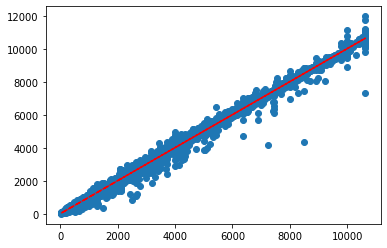

In [59]:
plt.plot(y_test,y_test, 'r--')
plt.scatter(y_test, y_pred)
plt.show()